## Kickstarter Project Exploration

Explore cancer projects from Kickstarter

In [1]:
import os.path as op

import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = 100

from scipy.stats import ttest_ind

import statsmodels.api as sm

In [2]:
DATA_PROCESSED = '../data/processed'

In [3]:
data = pd.read_csv(op.join(DATA_PROCESSED, 'cancer_projects_full.csv'))

data.sample(5)

,id,name,blurb,created,launched,deadline,goal,spotlight,staff_pick,status,status_changed_at,backers,usd_pledged,pledged,currency,current_currency,category,geo_country,geo_state,geo_type,url,text,mean_donation,text_length_chars,text_length_words,text_length_sentences,pledged_to_goal,duration,month,day_of_week,year,from_US,from_Town,blurb_length_words
339,1266882117,ANGRY BACTERIA - GAME FOR ADULTS and KIDS,Save your internal body parts! Fight bacteria ...,2012-07-13 14:11:02,2012-07-14 14:05:44,2012-08-08 14:05:44,8000,False,False,failed,1344434746,3,20.000000,20.0,USD,USD,games,UA,Rivne Oblast,Town,https://www.kickstarter.com/projects/112916790...,Hi! My name is Zhanna & I`m a translator (I am...,6.666667,6434,1145,45,0.002500,25 days 00:00:00.000000000,7,5,2012,0,1,17
219,499711991,Nurse Ted: A Children's Guide to Cancer,A picture book to help support children's unde...,2015-11-04 20:57:44,2016-05-27 08:39:41,2016-07-06 08:39:41,1500,True,False,successful,1467794381,37,2357.938957,1603.0,GBP,USD,publishing,GB,England,Town,https://www.kickstarter.com/projects/158608160...,We are creating the Nurse Ted picture books in...,63.728080,4040,691,39,1.068667,40 days 00:00:00.000000000,5,4,2016,0,1,21
104,1884688500,"""give HOPE to help them cope""","Cancer Cares is social enterprise, whose sole ...",2015-09-04 06:31:50,2017-04-28 15:38:02,2017-05-28 15:38:02,10000,False,False,failed,1495985882,1,25.000000,25.0,USD,USD,crafts,US,AZ,Town,https://www.kickstarter.com/projects/914430562...,,25.000000,5,0,0,0.002500,30 days 00:00:00.000000000,4,4,2017,1,1,21
386,84054747,"""Do Us Part"" - Indie Romantic Drama",After Parker and Ellie find out that her cance...,2015-09-21 19:34:40,2015-10-10 19:02:22,2015-11-09 20:02:22,3000,True,False,successful,1447099342,51,5015.000000,5015.0,USD,USD,film & video,US,CA,Town,https://www.kickstarter.com/projects/richardva...,The Do Us Part crew is thrilled to see our pro...,98.333333,4029,709,38,1.671667,30 days 01:00:00.000000000,10,5,2015,1,1,22
150,1312205664,All Things Cancer Podcast,Help fund the 1st month of podcasts to offer s...,2017-03-13 13:26:58,2017-03-13 15:43:44,2017-03-20 15:43:44,2500,False,False,failed,1490024624,1,150.000000,150.0,USD,USD,publishing,US,TX,Town,https://www.kickstarter.com/projects/558516877...,All Things Cancer is a podcast dedicated to pr...,150.000000,955,164,9,0.060000,7 days 00:00:00.000000000,3,0,2017,1,1,21


In [4]:
data.shape

(455, 34)

Clean out projects not classified as Success or Fail

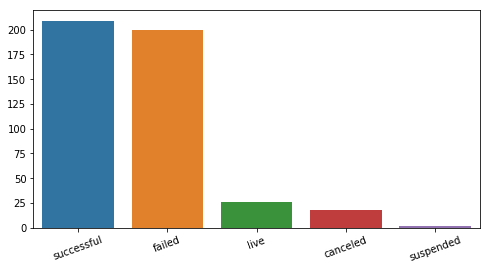

In [5]:
cnt = data['status'].value_counts()
plt.subplots(figsize=(8,4))
sns.barplot(cnt.index, cnt.values)
plt.xticks(rotation=20);

In [6]:
data = data[data['status'].isin(['successful', 'failed'])]
data.shape

(409, 34)

Popular Country of Origin

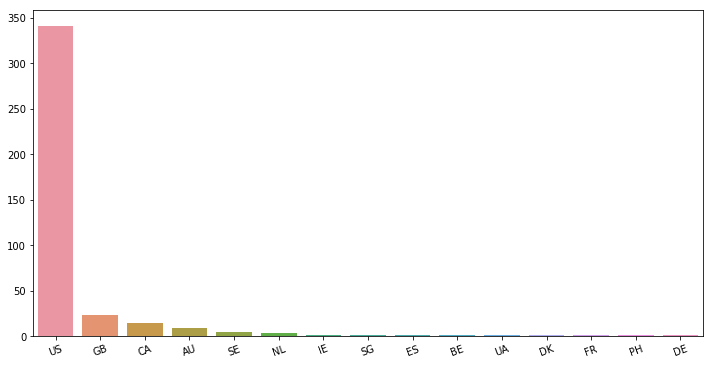

In [7]:
cnt = data['geo_country'].value_counts()
plt.subplots(figsize=(12,6))
sns.barplot(cnt.index, cnt.values)
plt.xticks(rotation=20);

Popular Project Parent Categories

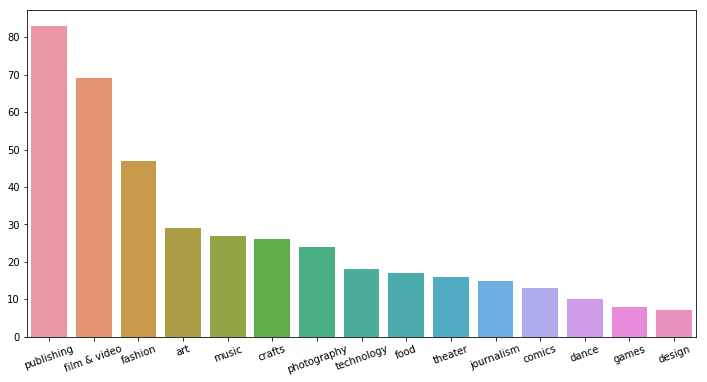

In [8]:
cnt = data['category'].value_counts()
plt.subplots(figsize=(12,6))
sns.barplot(cnt.index, cnt.values)
plt.xticks(rotation=20);

Geo Types

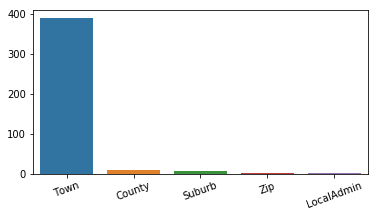

In [9]:
cnt = data['geo_type'].value_counts()
plt.subplots(figsize=(6,3))
sns.barplot(cnt.index, cnt.values)
plt.xticks(rotation=20);

Duration

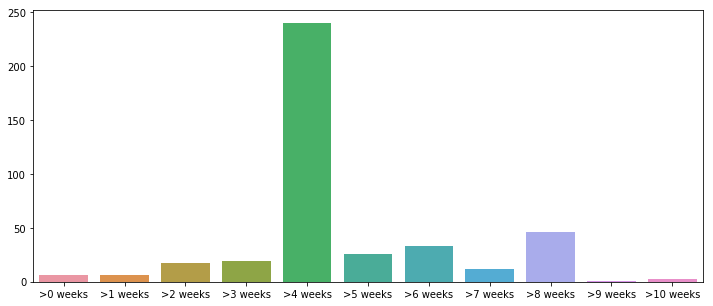

In [10]:
plt.subplots(figsize=(12,5))
td = pd.Series([ pd.Timedelta(days=i) for i in range(0, 92, 7)])
r = pd.cut(pd.TimedeltaIndex(data['duration']).to_series(), td, labels=False).value_counts()
g = sns.barplot(r.index, r.values)
g.set_xticklabels([f'>{int(w)} weeks' for w in td.dt.days / 7]);